<a href="https://colab.research.google.com/github/mahir21/finbert-practice-1.0/blob/main/Finbert_Lstm_reliance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
import io

# Upload files from your local system
uploaded = files.upload()

# Assuming the file name is 'finbert_stock.csv'
# Use the correct key from the 'uploaded' dictionary to read the file
data = pd.read_csv(io.BytesIO(uploaded['finbert_stock_cleaned.csv']))

# Now your data is loaded into the 'data' DataFrame






Saving finbert_stock_cleaned.csv to finbert_stock_cleaned.csv


In [ ]:
data.isnull().any()

Date               False
sentiment_score    False
Close              False
dtype: bool

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Preprocessing the data
# Normalizing the features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['sentiment_score', 'Close']])

# Function to create sequences of data points
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   # Sentiment score
        X.append(a)
        Y.append(dataset[i + time_step, 1])  # Close price
    return np.array(X), np.array(Y)

# Define time step and create dataset
time_step = 10
X, y = create_dataset(scaled_data, time_step)

# Splitting dataset into train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshaping input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Create the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=100)

# Prediction and check performance
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)




Epoch 1/100
32/32 [==============================] - 3s 4ms/step - loss: 0.0483
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0376
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.0371
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.0384
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.0356
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.0348
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0365
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0347
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0371
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0373
Epoch 11/100
32/32 [==============================] - 0s 5ms/step - loss: 0.0329
Epoch 12/100
32/32 [==============================] - 0s 5ms/step - loss: 0.0342
Epoch 13/100
32/32 [=================

NaN in train_predict: False
NaN in test_predict: False


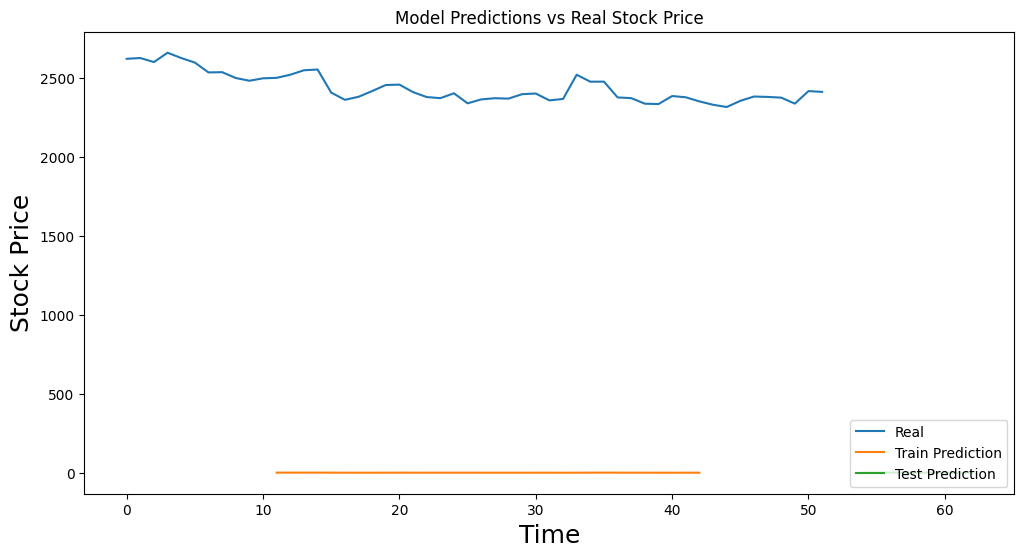

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 10, 50)            10400     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31901 (124.61 KB)
Trainable params: 31901 (124.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Transform back to original form
# Assuming 'train_predict' and 'test_predict' are your model's predictions for the training and testing sets

# Reshape the predictions to fit the scaler's expected input shape
train_predict_reshaped = train_predict.reshape(-1, 1)
test_predict_reshaped = test_predict.reshape(-1, 1)

print("NaN in train_predict:", np.isnan(train_predict).any())
print("NaN in test_predict:", np.isnan(test_predict).any())

# Inverse transform to get the original scale of stock prices
y_train = scaler.inverse_transform(np.concatenate((np.zeros_like(train_predict_reshaped), train_predict_reshaped), axis=1))[:, 1]
y_test = scaler.inverse_transform(np.concatenate((np.zeros_like(test_predict_reshaped), test_predict_reshaped), axis=1))[:, 1]

# Now, 'train_predict_original' and 'test_predict_original' are your inverse-transformed predictions

#y_train = scaler.inverse_transform(np.concatenate((X_train[:,:,0], y_train.reshape(-1,1)), axis=1))[:,1]
#y_test = scaler.inverse_transform(np.concatenate((X_test[:,:,0], y_test.reshape(-1,1)), axis=1))[:,1]

# Plotting
plt.figure(figsize=(12,6))
plt.title('Model Predictions vs Real Stock Price')
plt.xlabel('Time', fontsize=18)
plt.ylabel('Stock Price', fontsize=18)
plt.plot(data['Close'])
plt.plot(range(time_step+1, len(y_train)+time_step+1), train_predict)
plt.plot(range(len(y_train)+2*time_step+2, len(y_train)+len(test_predict)+2*time_step+2), test_predict)
plt.legend(['Real', 'Train Prediction', 'Test Prediction'], loc='lower right')
plt.show()

# Output model summary
model.summary()